<a href="https://colab.research.google.com/github/LokeshVadlamudi/EmergingTechnologiesML/blob/master/Assignment_2/Assignment_2_part1/assignment2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

x = tf.constant(5.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

print(tape.gradient(y, x).numpy()) # -> 75.0

75.0


In [4]:
#Importing necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Generating 10000 samples each for postive and negative data
num_samples = 10000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)

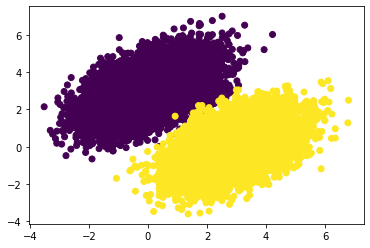

In [5]:
#Plotting the postive and negative samples
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [6]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [7]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0950
Epoch 1: last batch loss = 0.0884
Epoch 2: last batch loss = 0.0509
Epoch 3: last batch loss = 0.0347
Epoch 4: last batch loss = 0.0408
Epoch 5: last batch loss = 0.0166
Epoch 6: last batch loss = 0.0275
Epoch 7: last batch loss = 0.0320
Epoch 8: last batch loss = 0.0130
Epoch 9: last batch loss = 0.0216


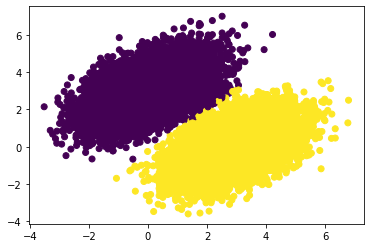

In [8]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)